# `INTERN ON LetsGrowMore(LGM)`
## ` Beginner Level Task:`
### `Task no. 02 - Stock Market Prediction And Forecasting Using Stacked LSTM`
`Dataset from url :` https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

<img src="task-2-3.png" />

## `Abstract :` 
This project focuses on techniques and tools for handling Time Series Datasets. Main aim of this project is to make Stock Market Prediction and Forecasting using Stacked LSTM. 

Long short-term memory (LSTM) is an artificial neural network used in the fields of artificial intelligence and deep learning.

It is a variety of recurrent neural networks (RNNs) that are capable of learning long-term dependencies, especially in sequence prediction problems. LSTM has feedback connections, i.e., it is capable of processing the entire sequence of data, apart from single data points such as images.

### `Two approaches for solving this problem`

i) Univariate Time Series Analysis : univariate time series model here means that there are only one dependent variable on the time series model

ii) Multivariate Time Series Analysis: it consist of more than one time-dependent variable and each variable depends not only on its past values but also has some dependency on other variables.

### `STEPS : `

1) Importing Libraries and Loading data

2) Cleaning data and sorting data by date.

3) Applying univariate approch by selecting `Closing Price` as target variables.

4) Exploration and Analysis of Datasets.

5) Preprocessing by MinMax Scaler.

6) Preparing train and test datasets.

7) Constructing Stacked LSTM model.

8) Evaluation of Model.

9) Forecasting for future 30 days.

10) Acknowledgement and References


# `Let's Dive into the project`

## `Step-1:` Importing required important libraries and loading dataset...

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [152]:
# Loading dataset

url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
tataglobal_df = pd.read_csv(url)
tataglobal_df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [153]:
tataglobal_df.shape

(2035, 8)

In [154]:
tataglobal_df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [155]:
tataglobal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [156]:
tataglobal_df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [157]:
tataglobal_df.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [158]:
tataglobal_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


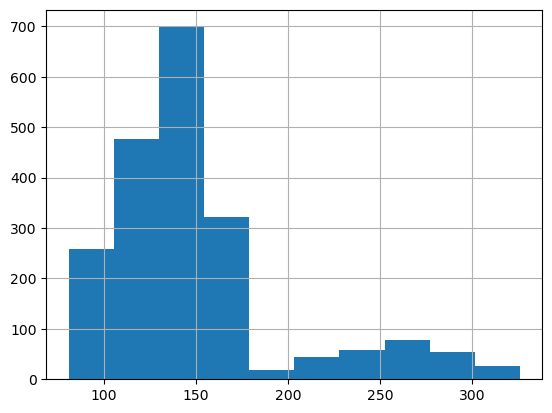

In [159]:
tataglobal_df.Close.hist();

### Parsing Dates 

When we work with time series data, we want to enrich the time & date component as much as possible 

We can do that by telling pandas which our column has dates in it using the `parse_dates` parameters

In [160]:
# Imoporting data again but this time parse dates

df = pd.read_csv(url, 
                 parse_dates=["Date"])
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [161]:
df.Date.dtype

dtype('<M8[ns]')

In [162]:
tataglobal_df.Date.dtype

dtype('O')

In [163]:
tataglobal_df.Date.head()

0    2018-09-28
1    2018-09-27
2    2018-09-26
3    2018-09-25
4    2018-09-24
Name: Date, dtype: object

In [164]:
df.Date.head()

0   2018-09-28
1   2018-09-27
2   2018-09-26
3   2018-09-25
4   2018-09-24
Name: Date, dtype: datetime64[ns]

### <M8[ns] is equivalent to datetime64[ns]

## `Step-2:` Data Cleaning and Sorting by date from oldest to newest data...

In [165]:
df.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

`Sort DataFrame by Date`

While working with time series data, it's a good idea to sort it by data

In [166]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [167]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [168]:
# Sort Dataframe in date order

df.sort_values(by=["Date"], inplace=True, ascending=True)
df.Date.head()

2034   2010-07-21
2033   2010-07-22
2032   2010-07-23
2031   2010-07-26
2030   2010-07-27
Name: Date, dtype: datetime64[ns]

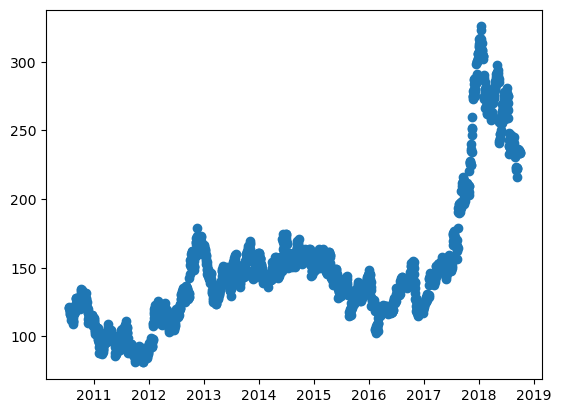

In [169]:
# Let's visualize closing price vs Date... 


fig, ax = plt.subplots()
ax.scatter(df.Date, df.Close);

In [170]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


### Make a copy of the original DataFrame

It is better to save our original database and make unchanged.

For changing lets make its copy

In [171]:
copy_df = df.copy()
copy_df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [172]:
copy_df.reset_index(inplace =True)
copy_df

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...,...
2030,4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2031,3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2032,2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2033,1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [173]:
copy_df.drop("index", axis=1, inplace=True)

In [174]:
copy_df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
1,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
3,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
4,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
2030,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2031,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2032,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2033,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [175]:
# Let's see correlation matrix...
copy_df.corr()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.999015,0.998825,0.997781,0.997840,0.385951,0.612877
High,0.999015,1.000000,0.998773,0.999155,0.999194,0.406405,0.630589
Low,0.998825,0.998773,1.000000,0.999051,0.999119,0.380621,0.608502
Last,0.997781,0.999155,0.999051,1.000000,0.999961,0.399328,0.624584
Close,0.997840,0.999194,0.999119,0.999961,1.000000,0.398911,0.624213
Total Trade Quantity,0.385951,0.406405,0.380621,0.399328,0.398911,1.000000,0.926931
Turnover (Lacs),0.612877,0.630589,0.608502,0.624584,0.624213,0.926931,1.000000


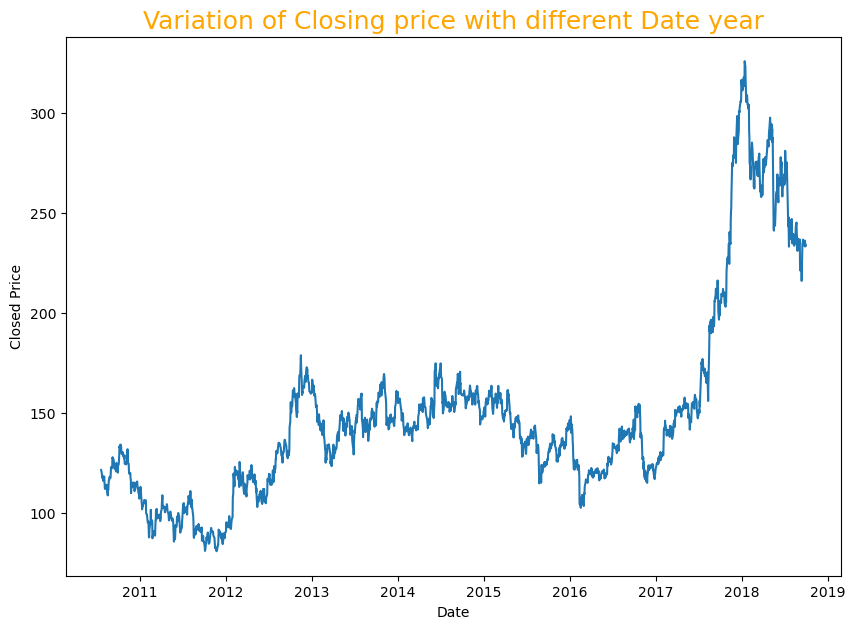

In [176]:
plt.figure(figsize=(10,7))
plt.plot(copy_df["Date"],
         copy_df["Close"])
plt.xlabel("Date")
plt.ylabel("Closed Price");
plt.title("Variation of Closing price with different Date year",
          color="orange",
          fontsize=18);

## `Step-3:` Applying univariate approch by selecting Closing Price as target variables.

### Univariate Analysis of Closing Price

For this task, i am just doing univariate analysis of Closing Price using Stacked LSTM and just taking close attribute from our dataset

In [177]:
# Considering only `Close` variable...

close_df = copy_df["Close"]
close_df

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

## `Step-4:` Exploration and Analysis of Datasets.

In [178]:
close_df.size

2035

In [179]:
close_df.shape

(2035,)

In [180]:
close_df.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2035 entries, 0 to 2034
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
2035 non-null   float64
dtypes: float64(1)
memory usage: 16.0 KB


In [181]:
close_df.describe()

count    2035.00000
mean      149.45027
std        48.71204
min        80.95000
25%       120.05000
50%       141.25000
75%       156.90000
max       325.75000
Name: Close, dtype: float64

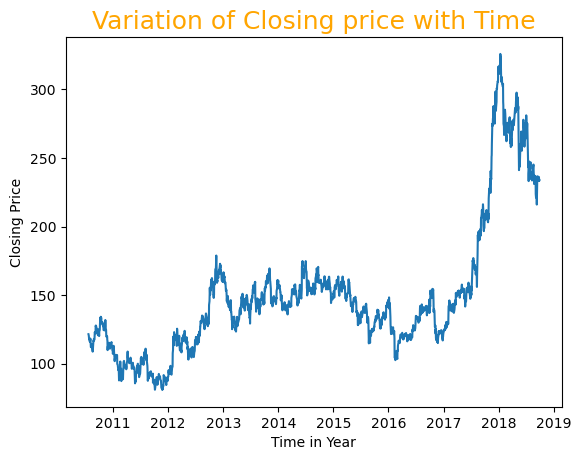

In [182]:
plt.plot(copy_df.Date, close_df)
plt.xlabel("Time in Year")
plt.ylabel("Closing Price");
plt.title("Variation of Closing price with Time",
          color="orange",
          fontsize=18);

## `Step-5:` Preprocessing by MinMax Scaler.

### LSTM is very sensitive to small change in value and so to the scale of the data. Thus, using `MinMax Scaler`, we scale it in the range of [0,1]

In [183]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler(feature_range=(0,1)) # (0,1) by default.But mentioned for understanding
close_df = minmax.fit_transform(np.array(close_df).reshape(-1, 1))
close_df

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

## `Step-6:` Preparing train and test datasets.

We normally split dataset using `train_test_split()` or Cross validation

but for `Time Series Datasets`, we split manually in such a way that train datasets must have oldest data than that of test dataset

In [184]:
train_size = int(len(close_df)*0.7)
test_size = len(close_df) - train_size
train_data = close_df[:train_size, :] # Slicing row from 0 to train_size indexlocation but column is kept unsliced.
test_data = close_df[train_size:len(close_df), :1]

In [185]:
train_data.shape

(1424, 1)

In [186]:
test_data.shape

(611, 1)

In [187]:
1424 + 611

2035

In [188]:
test_data

array([[0.1621732 ],
       [0.15951797],
       [0.16707516],
       [0.15992647],
       [0.16053922],
       [0.16441993],
       [0.16687092],
       [0.1693219 ],
       [0.16074346],
       [0.15972222],
       [0.16401144],
       [0.15727124],
       [0.14705882],
       [0.14460784],
       [0.15175654],
       [0.15441176],
       [0.15216503],
       [0.14848856],
       [0.15522876],
       [0.15767974],
       [0.1621732 ],
       [0.16094771],
       [0.16339869],
       [0.15931373],
       [0.15972222],
       [0.16115196],
       [0.16666667],
       [0.15747549],
       [0.15379902],
       [0.14848856],
       [0.15114379],
       [0.1503268 ],
       [0.15155229],
       [0.15645425],
       [0.16033497],
       [0.1566585 ],
       [0.15686275],
       [0.17749183],
       [0.17973856],
       [0.1744281 ],
       [0.19281046],
       [0.18607026],
       [0.18811275],
       [0.18443627],
       [0.18280229],
       [0.18464052],
       [0.18178105],
       [0.189

### Preparing our dataset for training, fitting and testing of LSTM model 

Suppose our dataset is: 122, 124, 135, 167, 187, 193, 199, 221, 228, 300

    train_data = 122, 124, 135, 167, 187, 193
    
    test_data =  199, 221, 228, 300
    
    Then we need to prepare our dataset as:
        
        for time_steps = 3 
    (By using past 3 values, we need to calculate present value)
    
        X          y 
     122 124 135   167
     124 135 167   187
     135 167 187   193
    
    Similarly for test_data

In [189]:
#This function will create dataset as mentioned above...

def create_dataset(dataset, time_step):
    X_data = []
    Y_data = []
    for i in range(len(dataset)-time_step-1):
        X_data.append(dataset[i:(i+time_step), 0])
        Y_data.append(dataset[i+time_step, 0])
    return np.array(X_data), np.array(Y_data)

In [190]:
# Reshaping into tuples of the form with X=t, t+1,..t+99 and Y=t+100 for time_step=100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [191]:
X_train.shape

(1323, 100)

In [192]:
y_train.shape

(1323,)

In [193]:
X_test.shape, y_test.shape

((510, 100), (510,))

### Reshaping input into 3-Dimensional form required for LSTM.

X_train.shape[1] = Total no. of columns in X_train = time_step = 100

So changing shape into 3-D form of: (no of data, features, 1)

In [194]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## `Step-7:`  Constructing Stacked LSTM model.

In [195]:
# Constructing our stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1))) #Input layer with 50 neurons
model.add(LSTM(50, return_sequences=True)) # Hidden layers with 50 neurons
model.add(LSTM(50))
model.add(Dense(1))# Output Layer
model.compile(loss='mean_squared_error', optimizer='adam')

In [196]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [197]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1);

Epoch 1/100
21/21 [==============================] - 17s 344ms/step - loss: 0.0105 - val_loss: 0.0197
Epoch 2/100
21/21 [==============================] - 5s 232ms/step - loss: 0.0018 - val_loss: 0.0035
Epoch 3/100
21/21 [==============================] - 5s 235ms/step - loss: 0.0010 - val_loss: 0.0051
Epoch 4/100
21/21 [==============================] - 5s 233ms/step - loss: 8.8531e-04 - val_loss: 0.0036
Epoch 5/100
21/21 [==============================] - 5s 232ms/step - loss: 8.2850e-04 - val_loss: 0.0030
Epoch 6/100
21/21 [==============================] - 5s 232ms/step - loss: 8.1489e-04 - val_loss: 0.0041
Epoch 7/100
21/21 [==============================] - 5s 233ms/step - loss: 8.1741e-04 - val_loss: 0.0039
Epoch 8/100
21/21 [==============================] - 5s 233ms/step - loss: 7.7931e-04 - val_loss: 0.0029
Epoch 9/100
21/21 [==============================] - 5s 235ms/step - loss: 7.1391e-04 - val_loss: 0.0025
Epoch 10/100
21/21 [==============================] - 5s 234ms/ste

21/21 [==============================] - 5s 234ms/step - loss: 1.4970e-04 - val_loss: 0.0010
Epoch 79/100
21/21 [==============================] - 5s 234ms/step - loss: 1.7352e-04 - val_loss: 6.5821e-04
Epoch 80/100
21/21 [==============================] - 5s 234ms/step - loss: 1.5590e-04 - val_loss: 5.8467e-04
Epoch 81/100
21/21 [==============================] - 5s 233ms/step - loss: 1.5290e-04 - val_loss: 4.9935e-04
Epoch 82/100
21/21 [==============================] - 5s 234ms/step - loss: 1.4206e-04 - val_loss: 8.4399e-04
Epoch 83/100
21/21 [==============================] - 5s 233ms/step - loss: 1.3277e-04 - val_loss: 7.6182e-04
Epoch 84/100
21/21 [==============================] - 5s 235ms/step - loss: 1.3930e-04 - val_loss: 7.0673e-04
Epoch 85/100
21/21 [==============================] - 5s 236ms/step - loss: 1.3821e-04 - val_loss: 0.0013
Epoch 86/100
21/21 [==============================] - 5s 236ms/step - loss: 1.3266e-04 - val_loss: 0.0011
Epoch 87/100
21/21 [===============

## `Step-8:` Evaluation of constructed LSTM Model.

### Visualizing Loss Function...

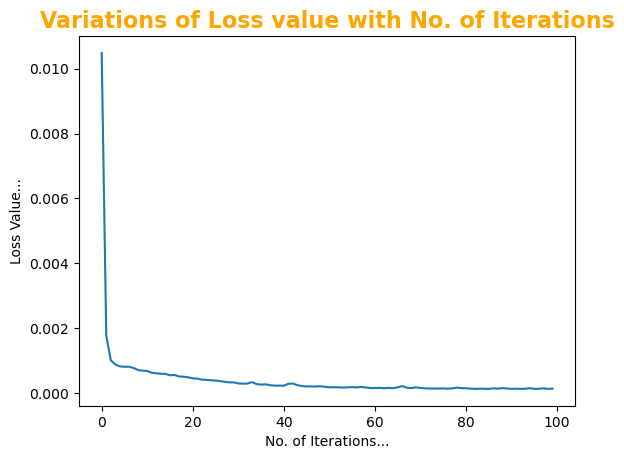

In [198]:
# Ploting Loss of our trained model

loss = model.history.history['loss']
plt.plot(loss)
plt.xlabel("No. of Iterations...")
plt.ylabel("Loss Value...")
plt.title("Variations of Loss value with No. of Iterations", color="orange", fontsize=16, fontweight="bold");

 `Above graph shows that loss has been decreased significantly with the increase in iterations, `

`thus, model is well-trained.`

### Evaluation of our constructed model on train and test data...

In [199]:
train_preds = minmax.inverse_transform(model.predict(X_train))
test_preds = minmax.inverse_transform(model.predict(X_test))

16/16 [==============================] - 1s 47ms/step


In [200]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_train,train_preds))

132.47622818825

In [201]:
math.sqrt(mean_squared_error(y_test, test_preds))

204.73548010335605

In [202]:
close_df

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [203]:
train_preds.shape

(1323, 1)

### Plotting 

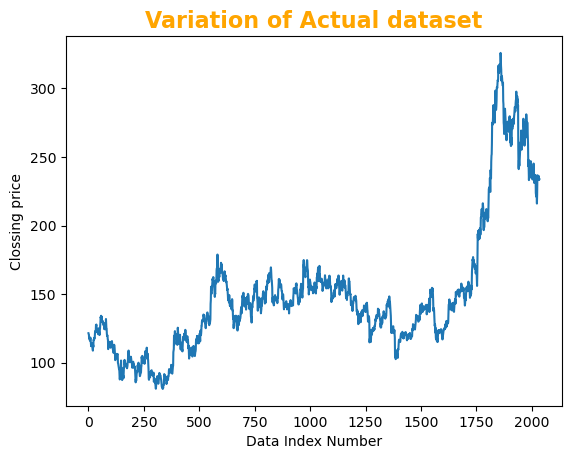

In [204]:
# shift train predictions for plotting

look_back=100  # to align predicted and actual on same curve...

trainPredictPlot = np.empty_like(close_df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_preds)+look_back, :] = train_preds

# shift test predictions for plotting
testPredictPlot = np.empty_like(close_df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_preds)+(look_back*2)+1:len(close_df)-1, :] = test_preds

# plot baseline i.e. Actual value of Closing price..

plt.plot(minmax.inverse_transform(close_df))
plt.title("Variation of Actual dataset", color="orange", fontsize=16, fontweight="bold")
plt.xlabel("Data Index Number")
plt.ylabel("Clossing price");

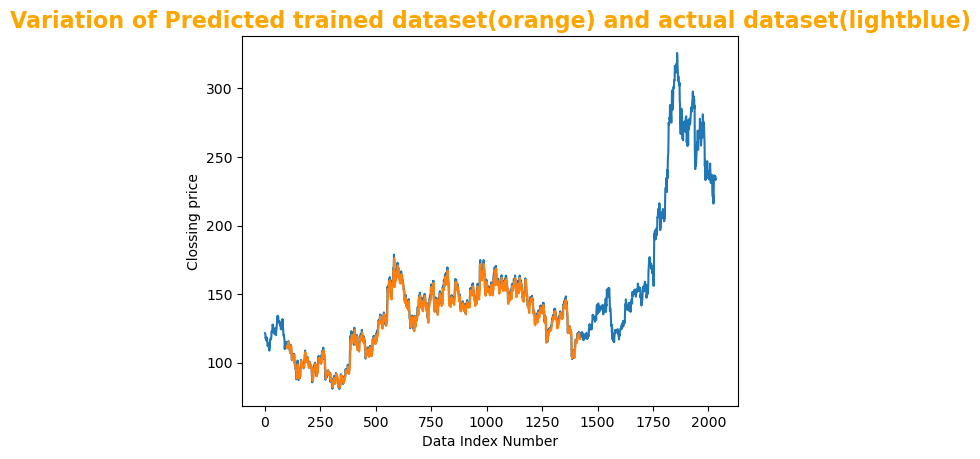

In [205]:
# Plot of Predictions on Closing Price made by our model on training dataset vs Actual Closing Price

plt.plot(minmax.inverse_transform(close_df))
plt.plot(trainPredictPlot)
plt.title("Variation of Predicted trained dataset(orange) and actual dataset(lightblue)", color="orange", fontsize=16, fontweight="bold")
plt.xlabel("Data Index Number")
plt.ylabel("Clossing price");

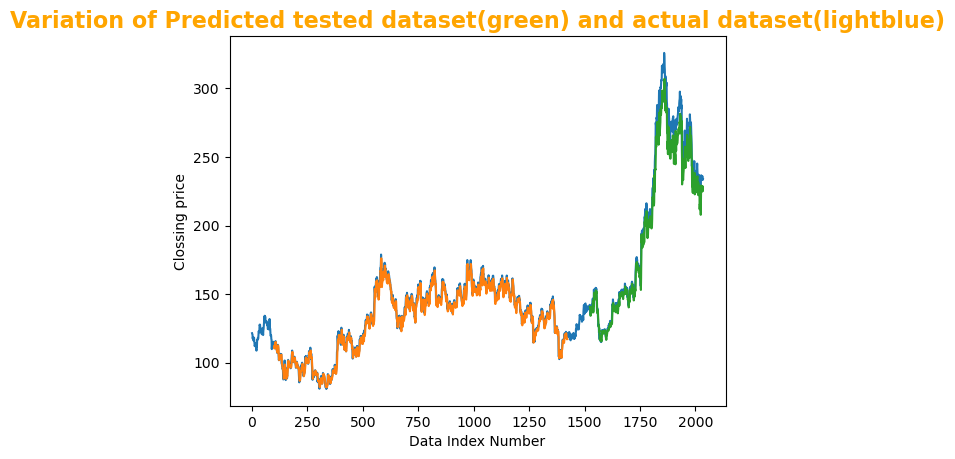

In [206]:
# Plot of Predictions on Closing Price made by our model on training dataset vs Actual Closing Price 
# vs Predictions on CLosing Price made by our model on test dataset

plt.plot(minmax.inverse_transform(close_df))
plt.plot(trainPredictPlot)
plt.title("Variation of Predicted tested dataset(green) and actual dataset(lightblue)", color="orange", fontsize=16, fontweight="bold")
plt.xlabel("Data Index Number")
plt.ylabel("Clossing price");
plt.plot(testPredictPlot)
plt.show()

Since, our model trained with first 100 data inputs and start predicting from 101 onwards..

so orange starts from 101th data index number. Similar logic for test data...

### `LightBlue` == `Actual Closing Price`
### `Orange`  == `Predictions on Closing Price made by our model on training dataset`
### `Green `  == `Predictions on CLosing Price made by our model on test dataset`

###  Lets visualize in a single frame....

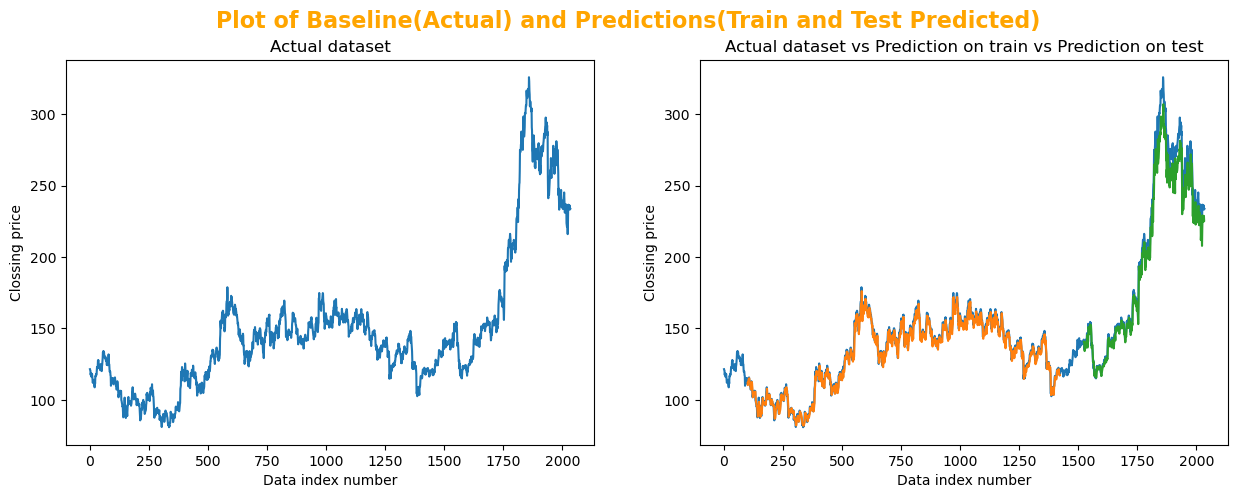

In [207]:
fig, (ax0, ax1) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(15,5))
ax0.plot(minmax.inverse_transform(close_df))
ax0.set(xlabel="Data index number",
        ylabel="Clossing price",
        title="Actual dataset");

ax0.set(xlabel="Data index number",
        ylabel="Clossing price",
        title="Actual dataset");

ax1.plot(minmax.inverse_transform(close_df))
ax1.plot(trainPredictPlot)
ax1.plot(testPredictPlot)


ax1.set(xlabel="Data index number",
        ylabel="Clossing price",
        title="Actual dataset vs Prediction on train vs Prediction on test");

fig.suptitle(t="Plot of Baseline(Actual) and Predictions(Train and Test Predicted)",
             color="orange",
             fontsize=16,
             fontweight="bold");

 ## `Step-9:` Forecasting for future 30 days.

In [208]:
# Let's check length of test_data...

len(test_data)

611

In [209]:
test_data.shape

(611, 1)

### Considering last 100 days data for the future prediction...

In [210]:
611-100

511

In [211]:
preds_input = test_data[511:]
preds_input[:5]

array([[0.85273693],
       [0.86213235],
       [0.83455882],
       [0.84375   ],
       [0.71466503]])

In [212]:
preds_input.shape

(100, 1)

In [213]:
# Reshaping into row matrix

preds_input = preds_input.reshape(1, -1)
preds_input.shape

(1, 100)

In [214]:
temp_input = list(preds_input)
len(temp_input)

1

In [215]:
temp_input = temp_input[0].tolist()

In [216]:
len(temp_input)

100

In [217]:
type(temp_input)

list

In [218]:
preds_input.shape[1]

100

# Demonstrating prediction for next 3 days just for debugging and understanding how it is working
This code was initially made for debugging and understanding...
You can use this code just to understand how length and shape varying and so on..

Thirty_days_output=[]

i=0

while(i<3):
    
    if(len(temp_input)>100):
        print(f"3rd={len(temp_input)}")
        temp_input = temp_input[1:]
        print(f"4th={len(temp_input)}")
        preds_input=np.array(temp_input) # getting latest 100 data
        print(f"2ndshape={preds_input.shape}")
        print(f"5th={len(temp_input)}")
        
        preds_input=preds_input.reshape(1,-1)
        preds_input = preds_input.reshape((1, time_step, 1))
        day_output = model.predict(preds_input, verbose=0)
        temp_input.extend(day_output[0].tolist())
        print(f"6th={len(temp_input)}")
       
        Thirty_days_output.extend(day_output.tolist())
    else:
        print(f"1st={len(temp_input)}")
        print(f"1stshape={preds_input.shape}")
        preds_input = preds_input.reshape((1, time_step,1))
        day_output = model.predict(preds_input, verbose=0)
        temp_input.extend(day_output[0].tolist())
        print(f"2nd={len(temp_input)}")
       
        Thirty_days_output.extend(day_output.tolist())
    print(f"Day-{i+1} input:\n\n{preds_input}\n\n")
    print(f"Day-{i+1} output:\n\n{day_output}\n\n")
    i=i+1

### After simplifying above code, we can replace that by this one..

In [219]:
#demonstrating prediction for next 30 days

Thirty_days_output=[]
i=0

while(i<30):
    if(len(temp_input)>100):
        temp_input = temp_input[1:]
        preds_input=np.array(temp_input) # getting latest 100 data
        preds_input=preds_input.reshape(1,-1)
    


    preds_input = preds_input.reshape((1, time_step,1))
    day_output = model.predict(preds_input, verbose=0)
    temp_input.extend(day_output[0].tolist())
    Thirty_days_output.extend(day_output.tolist())

    #print(f"Day-{i+1} input:\n\n{preds_input}\n\n")
    #print(f"Day-{i+1} output:\n\n{day_output}\n\n")
    i=i+1

In [220]:
print(Thirty_days_output)

[[0.5925127267837524], [0.5525482892990112], [0.5154978036880493], [0.48609161376953125], [0.46358245611190796], [0.44553065299987793], [0.42982709407806396], [0.41521167755126953], [0.40118563175201416], [0.38773036003112793], [0.3750349283218384], [0.3633066415786743], [0.3526729345321655], [0.3431585431098938], [0.3347017168998718], [0.32718801498413086], [0.3204804062843323], [0.31444287300109863], [0.3089523911476135], [0.303905725479126], [0.29921817779541016], [0.2948223352432251], [0.2906638979911804], [0.28669846057891846], [0.2828894257545471], [0.27920597791671753], [0.2756214737892151], [0.2721143364906311], [0.2686659097671509], [0.2652614116668701]]


### Ploting last 130 days closing price graph

In [221]:
latest_100_days = np.arange(1,101)
predicted_30_days = np.arange(101,131)

In [222]:
len(close_df)

2035

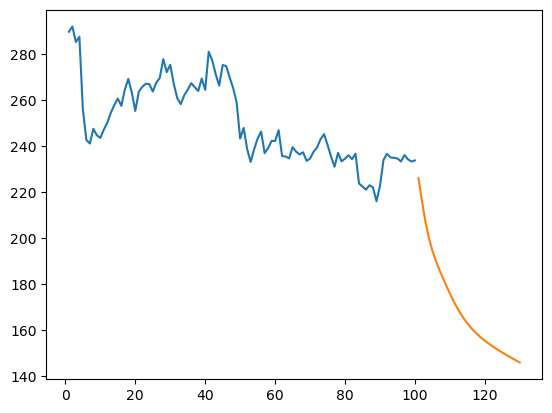

In [223]:
Latest_100_days_output = close_df[1935:]
plt.plot(latest_100_days, minmax.inverse_transform(Latest_100_days_output))
plt.plot(predicted_30_days, minmax.inverse_transform(Thirty_days_output));

### Graph is discontinuous but we can make graph continuous by appending both Latest_100_days_output and Thirty_days_output data in a list.
For that we need to convert Latest_100_days_output into list and append to each other 

In [224]:
type(Latest_100_days_output), type(Thirty_days_output)

(numpy.ndarray, list)

In [225]:
Latest_100_days_output_list = Latest_100_days_output.tolist()
Latest_100_days_output_list.extend(Thirty_days_output)
print(len(Latest_100_days_output_list))

130


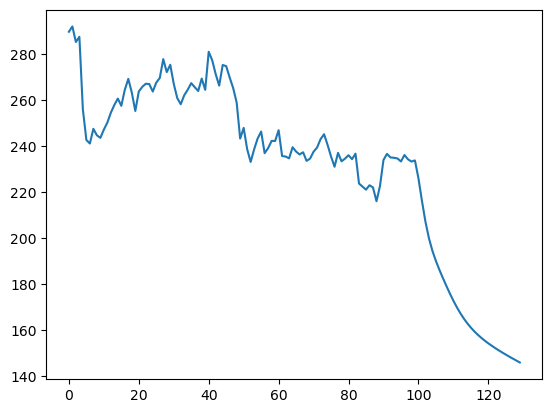

In [226]:
plt.plot(minmax.inverse_transform(Latest_100_days_output_list));

### Let's Visualize in single frame...

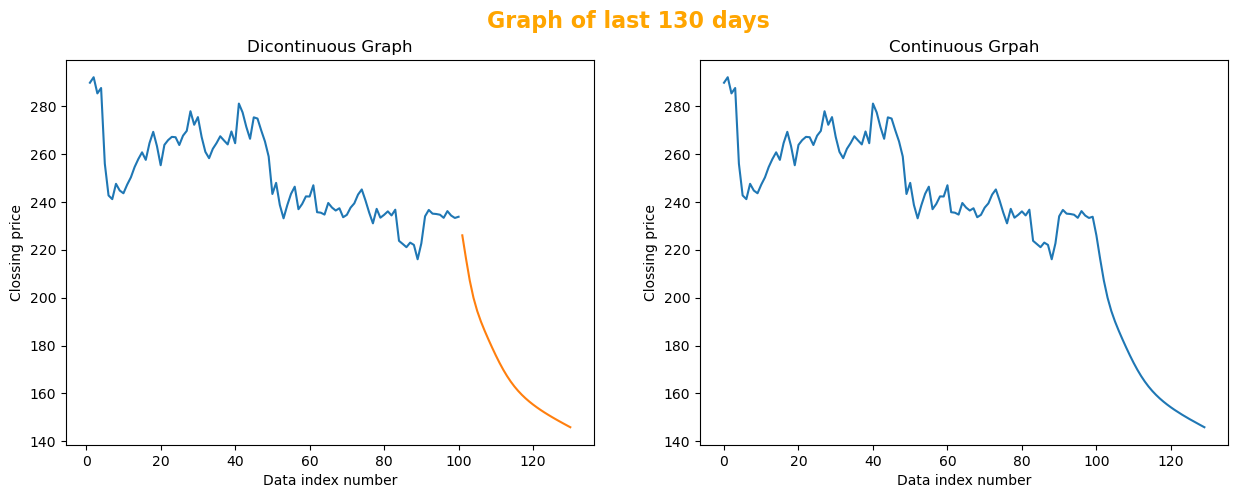

In [227]:
fig, (ax0, ax1) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(15,5))

ax0.plot(latest_100_days, minmax.inverse_transform(Latest_100_days_output))
ax0.plot(predicted_30_days, minmax.inverse_transform(Thirty_days_output));

ax0.set(xlabel="Data index number",
        ylabel="Clossing price",
        title="Dicontinuous Graph");



ax1.plot(minmax.inverse_transform(Latest_100_days_output_list));


ax1.set(xlabel="Data index number",
        ylabel="Clossing price",
        title="Continuous Grpah");

fig.suptitle(t="Graph of last 130 days",
             color="orange",
             fontsize=16,
             fontweight="bold");

### `Finally completed my second task successfully`

## Thanking to `LetsGrowMore` and Respected sir `Aman Kesarwami` for this 

## golden opportunity to improve and enhance myself in the field of

## DataScience



### Also, i would like to thanks respected sir Krish Naik for your informative youtube video
 
 video link : https://www.youtube.com/watch?v=H6du_pfuznE&t=128s
 
### Also, i would like to thanks my mate Aman Poddar for coordination.

His linkedin id : https://www.linkedin.com/in/amanpoddar375/

###  References:

https://www.youtube.com/watch?v=5Gm3bWNBoWQ&t=1039s

https://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/




### Contact  me:

linkedin: https://www.linkedin.com/in/abhishek-thapa-b9a733199/

Copyright © 2022, Abhishek Thapa Inc. All Rights Reserved